# **Actividad 7 - Bootcamp Datascience**
### **Presentado por: Rafael Cipagauta Carvajal**

In [81]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Cargar el dataset
ruta="c:\\Users\\Rafael\\Desktop\\Bootcamp Data Science - BIT\\Ejercicios_Bootcamp_DS\\E1\\"
df=pd.read_csv(ruta+'Dataset Bootcamp_Final.csv',sep=';',encoding='utf-8')
df.head()

,Código Formulario,Codigo Prestamo,Fecha de creación,Alcaldia/Municipio,Colonia,Ciudad MX,Calle,Codigo Postal,Ingreso Neto,Trully Listed Weeks,ScoreFisValor,Con trabajo actual,Total jobs,Year Since Last Job,Fecha de creación del préstamo,Fecha de nacimiento,Edad cliente,Mora máxima,Rango Mora,Estatus préstamo
0,FORM-392881,P-034842,2024-12-07,TECÁMAC,HUEYOTENCO,MÉXICO,Michoacan,55749.0,"MXN50.328,01",NaN,539.0,NaN,NaN,NaN,2024-12-07,1992-10-25,32.0,-30,Sin mora,Pendiente
1,FORM-392857,P-034840,2024-12-07,CUAUHTÉMOC,EX-HIPÓDROMO DE PERALVILLO,CIUDAD DE MÉXICO,Enrique Granados 151A,6250.0,"MXN22.461,92",NaN,NaN,NaN,NaN,NaN,2024-12-07,1989-07-05,35.0,-30,Sin mora,Pendiente
2,FORM-392873,P-034841,2024-12-07,ETCHOJOA,EL CRUCERO,SONORA,Miguel hidalgo 233,85280.0,"MXN9.342,84",NaN,NaN,NaN,NaN,NaN,2024-12-07,1995-04-17,29.0,-30,Sin mora,Pendiente
3,FORM-392928,P-034845,2024-12-07,JIUTEPEC,SAN FRANCISCO TEXCALPA,MORELOS,Naranjo mzna 21 lote 28,62573.0,"MXN22.900,28",NaN,595.0,NaN,NaN,NaN,2024-12-07,1977-02-24,47.0,-30,Sin mora,Pendiente
4,FORM-392917,P-034843,2024-12-07,NAUCALPAN DE JUÁREZ,SAN BARTOLO NAUCALPAN (NAUCALPAN CENTRO),MÉXICO,Avenida Gustavo Baz #31,53000.0,"MXN7.038,72",NaN,NaN,NaN,NaN,NaN,2024-12-07,1983-11-15,41.0,-30,Sin mora,Pendiente


In [83]:
# Imputar valores nulos en columnas categóricas con "Desconocido"
categorical_cols = ["Alcaldia/Municipio", "Colonia", "Ciudad MX", "Calle"]
df[categorical_cols] = df[categorical_cols].fillna("Desconocido")

In [84]:
# Imputar valores nulos en columnas categóricas con "Desconocido"
categorical_cols = ["Alcaldia/Municipio", "Colonia", "Ciudad MX", "Calle"]
df[categorical_cols] = df[categorical_cols].fillna("Desconocido")

# Convertir 'Ingreso Neto' a numérico
df["Ingreso Neto"] = df["Ingreso Neto"].replace({"MXN": "", "\\.": "", ",": "."}, regex=True).astype(float)

# Imputar valores nulos en 'Ingreso Neto' con la mediana
df["Ingreso Neto"].fillna(df["Ingreso Neto"].median(), inplace=True)

# Imputar valores nulos en 'ScoreFisValor' con la mediana
df["ScoreFisValor"].fillna(df["ScoreFisValor"].median(), inplace=True)

# Imputar valores nulos en 'Con trabajo actual' con la moda
df["Con trabajo actual"].fillna(df["Con trabajo actual"].mode()[0], inplace=True)

# Eliminar columnas con demasiados valores nulos
df.drop(columns=["Trully Listed Weeks", "Total jobs", "Year Since Last Job"], inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_1656\2611230368.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ingreso Neto"].fillna(df["Ingreso Neto"].median(), inplace=True)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_1656\2611230368.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [85]:
# Eliminar filas con valores completamente desconocidos
df.dropna(subset=["Fecha de nacimiento", "Edad cliente"], inplace=True)

In [86]:
df

,Código Formulario,Codigo Prestamo,Fecha de creación,Alcaldia/Municipio,Colonia,Ciudad MX,Calle,Codigo Postal,Ingreso Neto,ScoreFisValor,Con trabajo actual,Fecha de creación del préstamo,Fecha de nacimiento,Edad cliente,Mora máxima,Rango Mora,Estatus préstamo
0,FORM-392881,P-034842,2024-12-07,TECÁMAC,HUEYOTENCO,MÉXICO,Michoacan,55749.0,50328.01,539.0,W,2024-12-07,1992-10-25,32.0,-30,Sin mora,Pendiente
1,FORM-392857,P-034840,2024-12-07,CUAUHTÉMOC,EX-HIPÓDROMO DE PERALVILLO,CIUDAD DE MÉXICO,Enrique Granados 151A,6250.0,22461.92,539.0,W,2024-12-07,1989-07-05,35.0,-30,Sin mora,Pendiente
2,FORM-392873,P-034841,2024-12-07,ETCHOJOA,EL CRUCERO,SONORA,Miguel hidalgo 233,85280.0,9342.84,539.0,W,2024-12-07,1995-04-17,29.0,-30,Sin mora,Pendiente
3,FORM-392928,P-034845,2024-12-07,JIUTEPEC,SAN FRANCISCO TEXCALPA,MORELOS,Naranjo mzna 21 lote 28,62573.0,22900.28,595.0,W,2024-12-07,1977-02-24,47.0,-30,Sin mora,Pendiente
4,FORM-392917,P-034843,2024-12-07,NAUCALPAN DE JUÁREZ,SAN BARTOLO NAUCALPAN (NAUCALPAN CENTRO),MÉXICO,Avenida Gustavo Baz #31,53000.0,7038.72,539.0,W,2024-12-07,1983-11-15,41.0,-30,Sin mora,Pendiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31162,FORM-001587,P-000058,2023-09-07,QUERÉTARO,COMERCIANTES,QUERÉTARO,Calle 1,76087.0,5748.00,528.0,W,2023-09-07,1997-09-25,27.0,427,Mora +360 días,Pendiente
31163,FORM-001593,P-000059,2023-09-07,VENUSTIANO CARRANZA,ARENAL 1A SECCIÓN,CIUDAD DE MÉXICO,Axayacatl,15600.0,15230.00,498.0,W,2023-09-07,1994-12-08,30.0,427,Mora +360 días,Pendiente
31164,FORM-000259,P-020555,2023-09-07,TLALNEPANTLA DE BAZ,LOMAS DE SAN ANDRÉS ATENCO,MÉXICO,CUERNAVACA,54040.0,15549.56,524.0,W,2024-05-30,1993-10-13,31.0,168,Mora 120 días,Pendiente
31165,FORM-001504,P-021844,2023-09-07,SANTIAGO MIAHUATLÁN,SANTIAGO MIAHUATLÁN,PUEBLA,Sonora,75820.0,6563.18,595.0,W,2024-06-15,1994-11-07,30.0,138,Mora 120 días,Pendiente


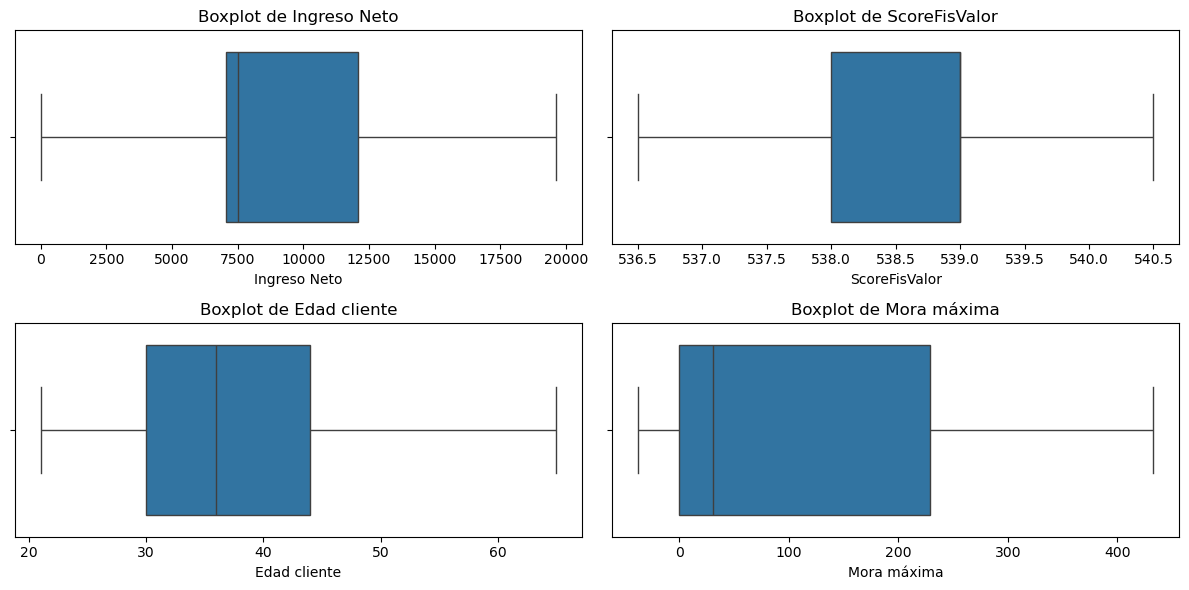

In [87]:
# Detección de outliers usando IQR
numeric_cols = ["Ingreso Neto", "ScoreFisValor", "Edad cliente", "Mora máxima"]
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar outliers con los límites
for col in numeric_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

# Graficar boxplots para verificar la eliminación de outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()